# Kiplinger's 100 Best Values in Public Colleges (2011), a data story

In this notebook, I am trying to answer the following questions: 
1. Are there any interesting trends?
2. Are there any anomalies?
3. Is there a possibility of a bar plot?
4. Is there a possibility of a scatter plot?

After doing some exploratory data analysis using various plots, I aim to gain some insights to the data and suggest any hypothesis to investigate further.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scorecard=pd.read_csv('scorecard.csv')

In [3]:
scorecard.shape

(100, 11)

In [4]:
scorecard.columns

Index(['Rank(Instate)', 'Rank(Out ofstate)', 'Name', 'State', 'Adm. rate',
       '4-Yr grad. rate', 'Total cost per yr. (In state)',
       'Total cost per yr. (Out of state)', 'Average need-based aid',
       'Average non-need-based aid', 'Average debt at graduation'],
      dtype='object')

Is there a trend betwen In-State and Out-of-State costs?

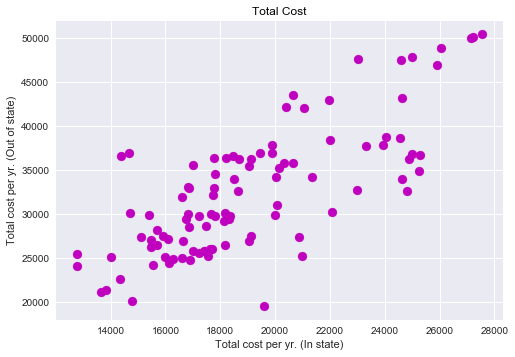

In [10]:
plt.figure();
scorecard.plot.scatter(x='Total cost per yr. (In state)', y='Total cost per yr. (Out of state)',s=80, c='m')
plt.title('Total Cost', color='black')
plt.show()

Looks like there is a positive trend. The Colleges with high In-state tuitions also have higher out-of-state tuitions

## Linear Regression with ordinary least squares
I have not separated data into Train and Test sets. 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge

In [27]:
scorecard['Total cost per yr. (Out of state)'].shape

(100,)

In [38]:
X_train = scorecard['Total cost per yr. (In state)'].values.reshape(-1,1)
y_train = scorecard['Total cost per yr. (Out of state)'].values.reshape(-1,1)
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[ 1.52828939]]
lr.intercept_: [ 3345.6114923]


### training performance, R^2

In [48]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Mean squared error: %.2f"
      % np.mean((lr.predict(X_train) - y_train) ** 2))

Training set score: 0.58
Mean squared error: 21611597.97


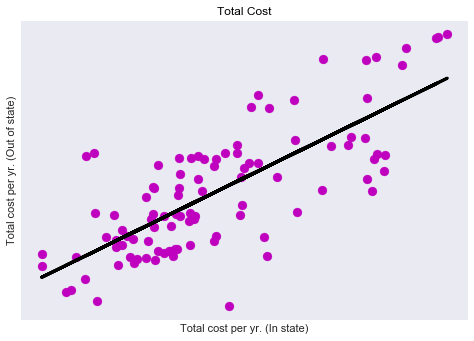

In [49]:
plt.figure();
scorecard.plot.scatter(x='Total cost per yr. (In state)', y='Total cost per yr. (Out of state)',s=80, c='m')
plt.title('Total Cost', color='black')
plt.plot(X_train, lr.predict(X_train),  color='black',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## Lets try Ridge Regression

In [57]:
ridge = Ridge(alpha=5).fit(X_train, y_train)

In [58]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

Training set score: 0.58


Changing Alpha value did not change the R2 value. Ridge regression was not a better fit for this data.

## Number of Top-100 colleges per states ordered alphabetically

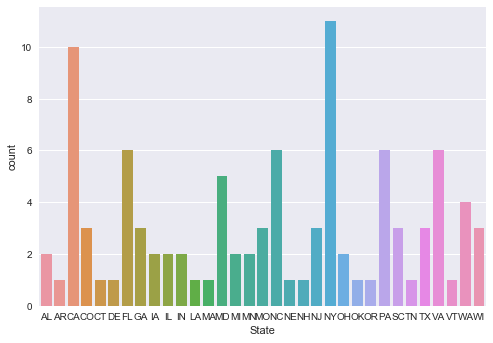

In [66]:
sns.countplot(x='State', data=scorecard.sort_values(['State'],ascending=[True]))
sns.despine()
plt.show()

In [68]:
StateName_Counts=scorecard['State'].value_counts().head(10)
StateName_Counts

NY    11
CA    10
PA     6
NC     6
VA     6
FL     6
MD     5
WA     4
MO     3
TX     3
Name: State, dtype: int64

NY has the most College ranked in Top-100.

Lets see if there is a trend between Acceptance rate and 4-year Graduation rate.

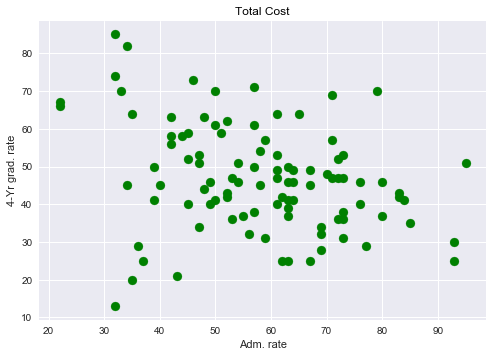

In [70]:
plt.figure();
scorecard.plot.scatter(x='Adm. rate', y='4-Yr grad. rate',s=80, c='g')
plt.title('Total Cost', color='black')
plt.show()

In [78]:
X_train2 = scorecard['Adm. rate'].values.reshape(-1,1)
y_train2 = scorecard['4-Yr grad. rate'].values.reshape(-1,1)
lr2 = linear_model.LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print("lr2.coef_: {}".format(lr2.coef_))
print("lr2.intercept_: {}".format(lr2.intercept_))
print("Training set score: {:.2f}".format(lr2.score(X_train2, y_train2)))

lr2.coef_: [[-0.2705743]]
lr2.intercept_: [ 62.55978045]
Training set score: 0.09


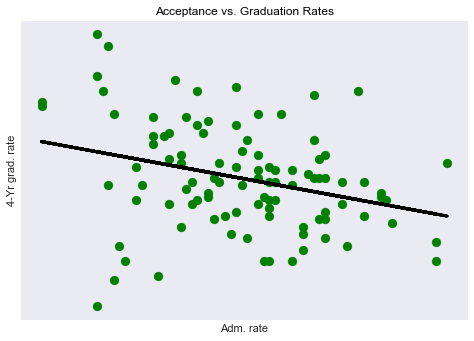

In [80]:
plt.figure();
scorecard.plot.scatter(x='Adm. rate', y='4-Yr grad. rate',s=80, c='g')
plt.title('Acceptance vs. Graduation Rates', color='black')
plt.plot(X_train2, lr2.predict(X_train2),  color='black',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Seems that there is a slight negative relatipship between Acceptance and 4-year Graduation rates. 

### Cost vs. Ranking